In [43]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from skimage import color
from skimage import io
import seaborn as sns
import math
import cv2
from sewar.full_ref import uqi, psnr, rmse, ssim
import pandas as pd
sns.set()
from scipy import signal
%matplotlib inline

In [44]:
img_paths=os.listdir('train_cleaned')
img_paths=['train_cleaned/'+x for x in img_paths]
img_paths.index('train_cleaned/72.png')
cleaned_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]

In [45]:
img_paths=os.listdir('train')
img_paths=['train/'+x for x in img_paths]
dirty_img=[cv2.imread(x, cv2.IMREAD_GRAYSCALE) for x in img_paths]

In [46]:
def median_subtract(noisy_img, ksize=23):
    background=cv2.medianBlur(noisy_img, ksize)
    result=cv2.subtract(background, noisy_img)
    result=cv2.bitwise_not(result)
    return (result, background)

In [47]:
denoised=cleaned_img[-1]
result, background=median_subtract(dirty_img[-1])
print(rmse(denoised, result))
print(uqi(denoised,result))
print(psnr(denoised, result))
print(ssim(denoised, result))

21.551074951604267
0.9924407913879264
21.461424862217974
(0.9175011553326193, 0.9189866168890374)


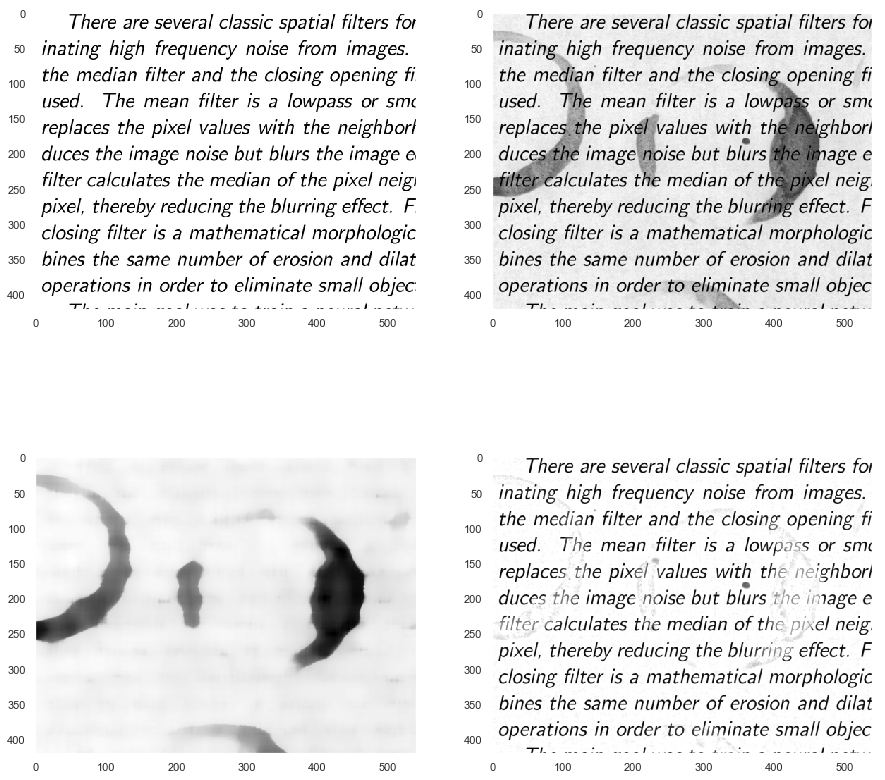

In [48]:
plt.rcParams["axes.grid"] = False
fig, axarr= plt.subplots(2,2, figsize=(15,15))
axarr[0,0].imshow(denoised, cmap='gray')
axarr[0,1].imshow(dirty_img[-1], cmap='gray')
axarr[1,0].imshow(background, cmap='gray')
axarr[1,1].imshow(result, cmap='gray')

ValueError: Invalid RGBA argument: 255

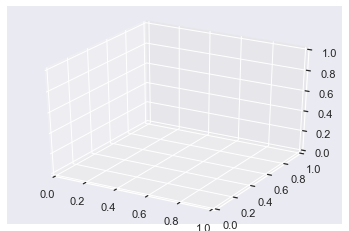

In [49]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png

x, y = np.mgrid[0:denoised.shape[0], 0:denoised.shape[1]]

ax = plt.gca(projection='3d')
ax.plot_surface(x, y, np.sin(0.02*x)*np.sin(0.02*y), rstride=2, cstride=2,
                facecolors=denoised)
plt.show()


In [ ]:
hist_arr=denoised.flatten()
#hist_arr = hist_arr/(hist_arr.max()/255.0)
hist_arr=hist_arr/hist_arr.max()
plt.figure(figsize=(12,6))
sns.distplot(hist_arr, bins=50, axlabel="Intensity")
plt.ylabel(ylabel="Frequency")
plt.title(label="Clean Image")

Text(0.5, 1.0, 'Denoised (final result) Image')

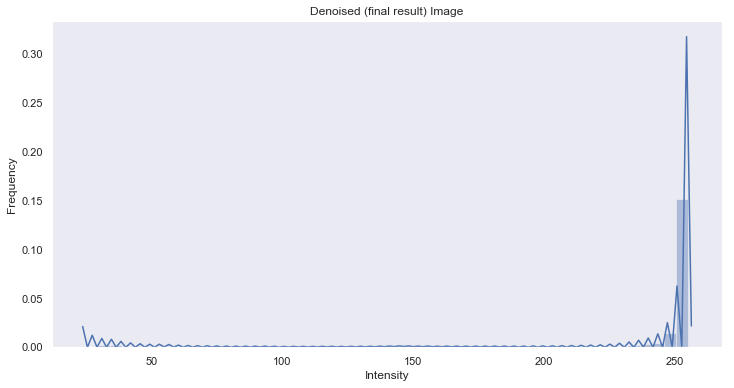

In [40]:
result_flat=result.flatten()
result_flat=result_flat/result_flat.max()
plt.figure(figsize=(12,6))
sns.distplot(result.flatten(), bins=50, axlabel="Intensity")
plt.ylabel(ylabel="Frequency")
plt.title(label="Denoised (final result) Image")

Text(0.5, 1.0, 'Clean Image')

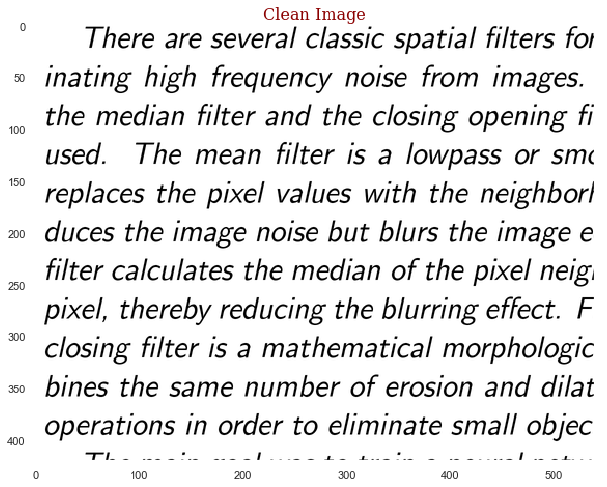

In [24]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.rcParams["axes.grid"] = False
fig=plt.figure(figsize=(12,8))
plt.imshow(denoised, cmap='gray')
plt.title('Clean Image', fontdict=font)

Text(0.5, 1.0, 'Dirty Image')

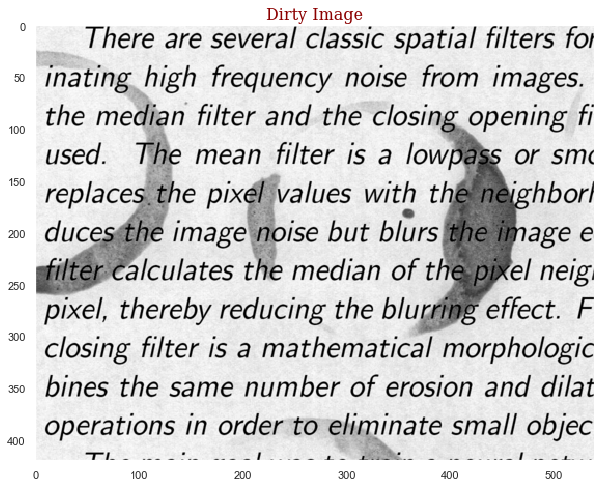

In [25]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.rcParams["axes.grid"] = False
fig=plt.figure(figsize=(12,8))
plt.imshow(dirty_img[-1], cmap='gray')
plt.title('Dirty Image', fontdict=font)

Text(0.5, 1.0, 'Calculated Background using Median Filter')

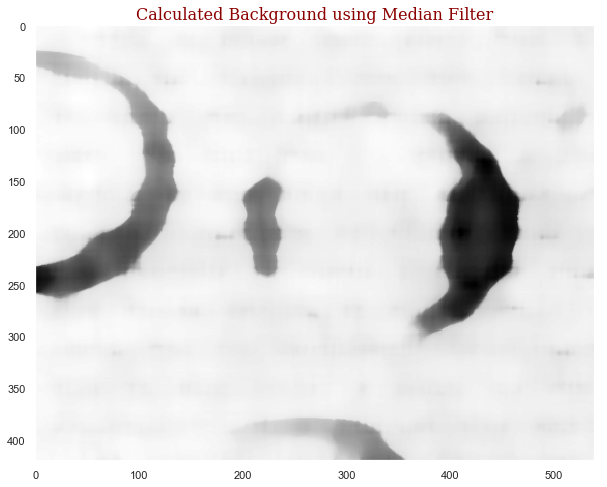

In [26]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.rcParams["axes.grid"] = False
fig=plt.figure(figsize=(12,8))
plt.imshow(background, cmap='gray')
plt.title('Calculated Background using Median Filter', fontdict=font)

Text(0.5, 1.0, 'Result (after subtracting background from OG image)')

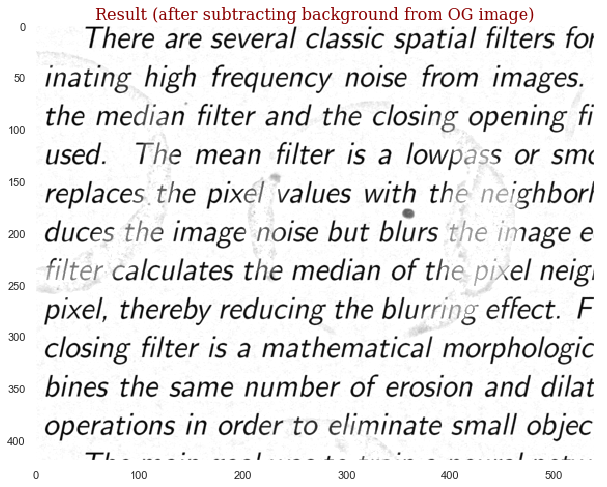

In [27]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
plt.rcParams["axes.grid"] = False
fig=plt.figure(figsize=(12,8))
plt.imshow(result, cmap='gray')
plt.title('Result (after subtracting background from OG image)', fontdict=font)